### Question 1_1

In [85]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
import time

df = pd.read_csv('DATA.csv')

train, test = train_test_split(df, test_size=0.255, random_state=1939671)

X = np.array(train[['x1', 'x2']])
y = np.array(train['y'])

X_test = np.array(train[['x1', 'x2']])
y_test = np.array(train['y'])

In [86]:
import copy

def J(f, x, dx=1e-8):
    n = x.shape
    func = f(x)
    jac = np.zeros(n)
    x_plus = x.copy()
    for i in range(n[0]):
        for j in range(n[1]):  # through columns to allow for vector addition
            x_plus[i, j] = x[i, j] + dx
            jac[i, j] = (f(x_plus) - func)/dx
            x_plus = x.copy()
    return jac

In [87]:
def J_(f, x, dx=1e-8):
    n = x.shape
    func = f(x)
    jac = np.zeros(n)
    x_plus = x.copy()
    for i in range(n[0]):
        x_plus[i] = x[i] + dx
        jac[i] = (f(x_plus) - func)/dx
        x_plus = x.copy()
    return jac

In [98]:
N = 10
P = len(y)
rho = 1e-3
sigma = 1

W = np.random.randn(X.shape[1], N)
b = np.random.randn(N)
v = np.random.randn(N)

In [99]:
def tanh(s, sigma):
    prod = 2*sigma*s
    return (np.exp(prod)-1)/(np.exp(prod)+1)

def feedforward(X, W, b, v, sigma):
    
    linear_layer = (np.dot(X, W) + b)
    activation = tanh(linear_layer, sigma)
    pred = np.dot(activation, v)
    
    return pred

In [100]:
def loss_v(v, X=X, y=y, sigma=sigma, N=N, rho=rho, b=b, W=W):
    P = len(y)
    x0 = np.concatenate((W, v, b), axis=None)
    norm = np.linalg.norm(x0)
    pred = feedforward(X, W, b, v, sigma)
    res = (0.5*(np.sum((pred-y)**2)))*(P**(-1)) + rho*(norm**2)*0.5
    
    return res

def loss_b(b, X=X, y=y, sigma=sigma, N=N, rho=rho, W=W, v=v):
    P = len(y)
    x0 = np.concatenate((W, v, b), axis=None)
    norm = np.linalg.norm(x0)
    pred = feedforward(X, W, b, v, sigma)
    res = (0.5*(np.sum((pred-y)**2)))*(P**(-1)) + rho*(norm**2)*0.5  
    
    return res

def loss_W(W, X=X, y=y, sigma=sigma, N=N, rho=rho, b=b, v=v):
    P = len(y)
    x0 = np.concatenate((W, v, b), axis=None)
    norm = np.linalg.norm(x0)
    pred = feedforward(X, W, b, v, sigma)
    res = (0.5*(np.sum((pred-y)**2)))*(P**(-1)) + rho*(norm**2)*0.5    
    
    return res

In [101]:
grads = {}

linear_layer = (np.dot(X, W) + b)
a_2 = tanh(linear_layer, sigma)
dJdf = (1/P)*(np.dot(a_2, v) - y)
dtanh = 1 - tanh(linear_layer, sigma)**2

dW1_1 = np.tensordot(dJdf, np.transpose(v), axes=0)
dW1_2 = dW1_1*dtanh

grads['v'] = np.dot(dJdf, a_2) + rho*v
grads['b'] = np.sum(dW1_2, axis=0) + rho*b
grads['W'] = np.tensordot(np.transpose(X), dW1_2, axes=1) + rho*W

In [102]:
J_(loss_b, b).T

array([ 0.1142932 , -0.00761504, -0.16211172,  0.22838718, -0.09441672,
       -0.10602359, -0.07632572,  0.10060168, -0.03769984,  0.03246852])

In [103]:
grads['b'].T

array([ 0.11429321, -0.00761507, -0.16211174,  0.22838716, -0.09441673,
       -0.10602358, -0.07632572,  0.10060166, -0.03769983,  0.03246849])

In [104]:
J_(loss_v, v).T

array([-0.92755827, -0.94161656,  0.85094176, -1.13314851,  0.35112759,
        1.18315597,  0.4519958 ,  1.24802177, -0.73780435,  0.33443686])

In [105]:
grads['v'].T

array([-0.92755826, -0.94161659,  0.85094177, -1.13314854,  0.35112761,
        1.18315596,  0.4519958 ,  1.24802175, -0.73780438,  0.33443688])

In [96]:
J(loss_W, W).T

array([[-0.01601785, -0.14466048],
       [ 0.1393365 ,  0.16025854],
       [-0.01724707, -0.03253324],
       [ 0.01876093,  0.9048357 ],
       [-0.06420353, -0.36777266],
       [ 0.01112568, -0.07694121],
       [ 0.12707899,  0.4541246 ],
       [ 0.04435017,  0.34369378],
       [-0.04812697, -0.14638279],
       [-0.00386555, -0.01489571]])

In [97]:
grads['W'].T

array([[-0.01601784, -0.14466048],
       [ 0.13933652,  0.16025853],
       [-0.01724705, -0.03253325],
       [ 0.01876093,  0.9048357 ],
       [-0.06420352, -0.36777264],
       [ 0.01112571, -0.07694121],
       [ 0.12707898,  0.45412464],
       [ 0.04435016,  0.34369381],
       [-0.04812699, -0.14638277],
       [-0.00386555, -0.01489571]])

### Question 1_2 

In [111]:
N = 10
c = np.random.randn(X.shape[1], N)
v = np.random.randn(N)
sigma = 1
P = len(y)
rho=1e-3

In [112]:
def rbf(X, c, sigma):
    """
    This function is only applied for a single observation
    x belongs to R^2
    c belongs to R^{2, 10}
    return R^10, 186
    """
    minus_matrix = []
    for i in range(len(c.T)):
        minus_matrix.append(X - c.T[i])
    minus_matrix = np.array(minus_matrix)

    return np.exp(-(np.linalg.norm(minus_matrix, axis=2)/sigma)**2)

def feedforward(X, c, v, sigma):
    """
    This function is only applied for a single observation
    x belongs to R^2
    c belongs to R^{2, 10}
    v belongs to R^N
    return float
    """
    
    pred = np.dot(rbf(X, c, sigma).T, v)
    return pred
    
def loss_v(v, X=X, y=y, sigma=sigma, N=N, rho=rho, c=c):

    P = len(y)
    x0 = np.concatenate((v, c), axis=None)
    sum_ = np.sum((feedforward(X, c, v, sigma) - y)**2)
    norm = np.linalg.norm(x0)
    res = (sum_*P**(-1) + rho*norm**2)*0.5 
    
    return res

def loss_c(c, X=X, y=y, sigma=sigma, N=N, rho=rho, v=v):
    
    P = len(y)
    x0 = np.concatenate((v, c), axis=None)
    sum_ = np.sum((feedforward(X, c, v, sigma) - y)**2)
    norm = np.linalg.norm(x0)
    res = (sum_*P**(-1) + rho*norm**2)*0.5 
    
    return res

In [113]:
grads = {}

z_1 = rbf(X, c, sigma).T
dJdf = (1/P)*(np.dot(z_1, v) - y)

minus_matrix = []
for i in range(len(c.T)):
    minus_matrix.append(X - c.T[i])
minus_matrix = np.array(minus_matrix)

dW1_1 = np.dot(dJdf.reshape((P, 1)), v.reshape((1,N)))
dzdc = ((2*z_1)/(sigma**2))*minus_matrix.T

grads['v'] = np.dot(dJdf, z_1) + rho*v
grads['c'] = np.sum(dzdc*dW1_1, axis=1) + rho*c

In [114]:
grads['v'].T

array([-0.19087348, -0.22647895, -0.15810057, -0.20932393, -0.22179149,
       -0.25606286, -0.15235662, -0.19599009, -0.0753367 , -0.16330882])

In [115]:
J_(loss_v, v).T

array([-0.19087347, -0.22647897, -0.1581006 , -0.20932394, -0.2217915 ,
       -0.25606288, -0.15235664, -0.19599009, -0.07533671, -0.16330883])

In [116]:
grads['c'].T

array([[ 0.04470326, -0.02547515],
       [-0.06439102, -0.09330885],
       [-0.06400485, -0.04874972],
       [-0.01938205,  0.03204334],
       [-0.02653544,  0.05296805],
       [-0.00777839,  0.00434297],
       [ 0.021409  ,  0.03983179],
       [ 0.07787467,  0.05077433],
       [-0.0780163 ,  0.01720381],
       [ 0.01895447,  0.00404262]])

In [117]:
J(loss_c, c).T

array([[ 0.04470326, -0.02547516],
       [-0.06439103, -0.09330885],
       [-0.06400485, -0.04874972],
       [-0.01938205,  0.03204335],
       [-0.02653546,  0.05296805],
       [-0.00777838,  0.00434295],
       [ 0.02140899,  0.0398318 ],
       [ 0.07787466,  0.05077434],
       [-0.0780163 ,  0.01720382],
       [ 0.01895446,  0.00404263]])

### An option could be to provide the jacobian directly to the optimizer so that it does the magic while using our jacobian calculator

In [23]:
def fun(x,a):
    return (x[0] - 1)**2 + (x[1] - a)**2

In [25]:
def fun_der(x, a):
    dx = 2 * (x[0] - 1)
    dy = 2 * (x[1] - a)
    return np.array([dx, dy])

def fun_hess(x, a):
    dx = 2
    dy = 2
    return np.diag([dx, dy])

In [28]:
import scipy

x0 = np.array([2, 0])
a = 2.5

     fun: 0.0
    hess: array([[2, 0],
       [0, 2]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 2
     nit: 2
    njev: 3
  status: 0
 success: True
       x: array([1. , 2.5])

In [35]:
%%time
scipy.optimize.minimize(fun, x0, args=(a,), method='CG', jac=fun_der)

Wall time: 996 µs


     fun: 1.4396711520283465e-29
     jac: array([-2.66453526e-15,  7.10542736e-15])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 1
    njev: 3
  status: 0
 success: True
       x: array([1. , 2.5])

In [36]:
%%time
scipy.optimize.minimize(fun, x0, args=(a,), method='CG')

Wall time: 1.99 ms


     fun: 4.9251258888196026e-15
     jac: array([-3.72266706e-08,  1.45220740e-07])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 1
    njev: 3
  status: 0
 success: True
       x: array([0.99999997, 2.50000007])

### Over and Underfitting

In [46]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
import time

np.random.seed(42)

df = pd.read_csv('DATA.csv')

train, test = train_test_split(df, test_size=0.255, random_state=1939671)

X = np.array(train[['x1', 'x2']])
y = np.array(train['y'])

X_test = np.array(test[['x1', 'x2']])
y_test = np.array(test['y'])


def tanh(s, sigma):
    prod = 2 * sigma * s
    return (np.exp(prod) - 1) / (np.exp(prod) + 1)


def feedforward(X, W, b, v, sigma):
    linear_layer = (np.dot(X, W) + b)
    activation = tanh(linear_layer, sigma)
    pred = np.dot(activation, v)

    return pred

def backpropagation(x0, funcArgs):
    
    X = funcArgs[0]
    y = funcArgs[1]
    sigma = funcArgs[2]
    N = funcArgs[3]
    rho = funcArgs[4]
    P = len(y)
    
    W = x0[:int(X.shape[1] * N)].reshape((X.shape[1], N))
    b = x0[int(X.shape[1] * N):int(X.shape[1] * N + N)]
    v = x0[int(X.shape[1] * N + N):]

    linear_layer = (np.dot(X, W) + b)
    a_2 = tanh(linear_layer, sigma)
    dJdf = (1 / P) * (np.dot(a_2, v) - y)
    dtanh = 1 - tanh(linear_layer, sigma) ** 2

    dW1_1 = np.tensordot(dJdf, np.transpose(v), axes=0)
    dW1_2 = dW1_1 * dtanh

    dv = np.dot(dJdf, a_2) + rho * v
    db = np.sum(dW1_2, axis=0) + rho * b
    dW = np.tensordot(np.transpose(X), dW1_2, axes=1) + rho * W

    return np.concatenate((dW, db, dv), axis=None)

def loss(x0, funcArgs, test=False):
    X = funcArgs[0]
    y = funcArgs[1]
    sigma = funcArgs[2]
    N = funcArgs[3]
    rho = funcArgs[4]

    W = x0[:int(X.shape[1] * N)].reshape((X.shape[1], N))
    b = x0[int(X.shape[1] * N):int(X.shape[1] * N + N)]
    v = x0[int(X.shape[1] * N + N):]

    P = len(y)
    norm = np.linalg.norm(x0)
    pred = feedforward(X, W, b, v, sigma)
    if test:
        res = ((np.sum((pred - y) ** 2)) * P ** (-1)) * 0.5
    else:
        res = ((np.sum((pred - y) ** 2)) * P ** (-1) + rho * norm**2) * 0.5

    return res


def feedforwardplot(x1, x2, W, b, v, sigma):
    X = np.array([x1, x2])
    linear_layer = (np.dot(X, W) + b)
    activation = tanh(linear_layer, sigma)
    pred = np.dot(activation, v)

    return pred


def train(X, y, sigma, N, rho, W, b, v, max_iter=1000,
          tol=1e-5, method='CG', func=loss):
          
    x0 = np.concatenate((W, b, v), axis=None)
    funcArgs = [X, y, sigma, N, rho]
    
    res = minimize(func,
                   x0,
                   args=funcArgs, 
                   method=method, 
                   tol=tol,
                   jac=backpropagation,
                   options={'maxiter':max_iter})  
    
    return res
    

def plotting(W, b, v, sigma):
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')
    # create the grid
    x = np.linspace(-3, 3, 50)
    y = np.linspace(-2, 2, 50)
    X_plot, Y_plot = np.meshgrid(x, y)

    Z = []
    for x1 in x:
        z = []
        for x2 in y:
            z.append(feedforwardplot(x1, x2, W, b, v, sigma))
        Z.append(z)
    Z = np.array(Z)

    ax.plot_surface(X_plot, Y_plot, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('F(x) learnt from MLP BackPropagation')
    plt.show()

sigma_grid = [1]
N_grid = np.linspace(2, 50, 25)
#rho_grid = np.linspace(1e-5, 1e-3, 3)
rho_grid = [1e-3]
method_grid = ['CG']
iterables = [sigma_grid, N_grid, rho_grid, method_grid]
min_loss = 10000
val_loss_list = []
train_loss_list = []

for t in itertools.product(*iterables):

    N = int(t[1])
    W = np.random.normal(size=(X.shape[1], N))
    b = np.random.normal(size=N)
    v = np.random.normal(size=N)

    x0 = np.concatenate((W, b, v), axis=None)

    print('===================')
    print('Sigma:', t[0])
    print('N:', N)
    print('Rho:', t[2])

    start = time.time()
    res = train(X, y, sigma=t[0], 
                N=N, rho=t[2], 
                W=W, b=b, v=v,
                max_iter=5000, tol=1e-6, 
                method=t[3], func=loss)
    stop = time.time()
    
    funcArgs_test = [X_test, y_test, t[0], N, t[2]]
    funcArgs = [X, y, t[0], N, t[2]]
    
    train_loss = loss(res.x, funcArgs, test=True)

    val_loss = loss(res.x, funcArgs_test, test=True)
    
    val_loss_list.append(val_loss)
    train_loss_list.append(train_loss)


Sigma: 1
N: 2
Rho: 0.001
Sigma: 1
N: 4
Rho: 0.001
Sigma: 1
N: 6
Rho: 0.001
Sigma: 1
N: 8
Rho: 0.001
Sigma: 1
N: 10
Rho: 0.001
Sigma: 1
N: 12
Rho: 0.001
Sigma: 1
N: 14
Rho: 0.001
Sigma: 1
N: 16
Rho: 0.001
Sigma: 1
N: 18
Rho: 0.001
Sigma: 1
N: 20
Rho: 0.001
Sigma: 1
N: 22
Rho: 0.001
Sigma: 1
N: 24
Rho: 0.001
Sigma: 1
N: 26
Rho: 0.001
Sigma: 1
N: 28
Rho: 0.001
Sigma: 1
N: 30
Rho: 0.001
Sigma: 1
N: 32
Rho: 0.001
Sigma: 1
N: 34
Rho: 0.001
Sigma: 1
N: 36
Rho: 0.001
Sigma: 1
N: 38
Rho: 0.001
Sigma: 1
N: 40
Rho: 0.001
Sigma: 1
N: 42
Rho: 0.001
Sigma: 1
N: 44
Rho: 0.001
Sigma: 1
N: 46
Rho: 0.001
Sigma: 1
N: 48
Rho: 0.001
Sigma: 1
N: 50
Rho: 0.001


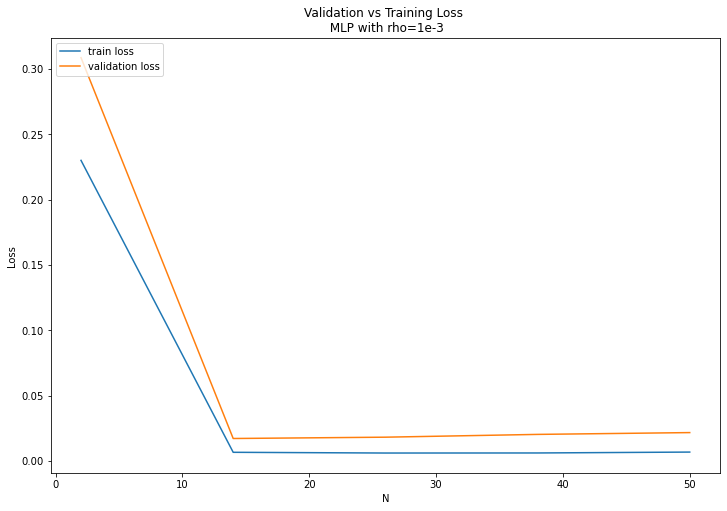

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(N_grid, train_loss_list)
plt.plot(N_grid, val_loss_list)
plt.title('Validation vs Training Loss \n MLP with rho=1e-3')
plt.ylabel('Loss')
plt.xlabel('N')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

In [40]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
import time

df = pd.read_csv('DATA.csv')

train, test = train_test_split(df, test_size=0.255, random_state=1939671)

X = np.array(train[['x1', 'x2']])
y = np.array(train['y'])

X_test = np.array(test[['x1', 'x2']])
y_test = np.array(test['y'])

def rbf(X, c, sigma):
    """
    This function is only applied for a single observation
    x belongs to R^2
    c belongs to R^{2, 10}
    return R^10, 186
    """
    minus_matrix = []
    for i in range(len(c.T)):
        minus_matrix.append(X - c.T[i])
    minus_matrix = np.array(minus_matrix)

    return np.exp(-(np.linalg.norm(minus_matrix, axis=2)/sigma)**2)

def feedforward(X, c, v, sigma):
    """
    This function is only applied for a single observation
    x belongs to R^2
    c belongs to R^{2, 10}
    v belongs to R^N
    return float
    """
    
    pred = np.dot(rbf(X, c, sigma).T, v)
    return pred
    
def backpropagation(x0, funcArgs):

    X = funcArgs[0]
    y = funcArgs[1]
    sigma = funcArgs[2]
    N = funcArgs[3]
    rho = funcArgs[4]
    P = len(y)
    
    c = x0[:int(X.shape[1]*N)].reshape((X.shape[1],N))
    v = x0[int(X.shape[1]*N):]
    
    z_1 = rbf(X, c, sigma).T
    dJdf = (1/P)*(np.dot(z_1, v) - y)

    minus_matrix = []
    for i in range(len(c.T)):
        minus_matrix.append(X - c.T[i])
    minus_matrix = np.array(minus_matrix)

    dW1_1 = np.dot(dJdf.reshape((P, 1)), v.reshape((1,N)))
    dzdc = ((2*z_1)/(sigma**2))*minus_matrix.T

    dv = np.dot(dJdf, z_1) + rho*v
    dc = np.sum(dzdc*dW1_1, axis=1) + rho*c

    return np.concatenate((dc, dv), axis=None)
    
def loss(x0, funcArgs):
    
    X = funcArgs[0]
    y = funcArgs[1]
    sigma = funcArgs[2]
    N = funcArgs[3]
    rho = funcArgs[4]
    
    c = x0[:int(X.shape[1]*N)].reshape((X.shape[1],N))
    v = x0[int(X.shape[1]*N):]

    P = len(y)
    sum_ = np.sum((feedforward(X, c, v, sigma) - y)**2)
    norm = np.linalg.norm(x0)
    res = (sum_*P**(-1) + rho*norm**2)*0.5 
    
    return res
    
def loss_test(X, y, sigma, N, rho, c, v):

    P = len(y)
    res = np.sum((feedforward(X, c, v, sigma) - y)**2)*0.5*P**(-1)
    
    return res
    
def feedforwardplot(x_i_1, x_i_2, c, v, sigma):
    x_i = np.array([x_i_1, x_i_2])
    pred = np.dot(np.exp(-(np.linalg.norm((x_i - c.T), axis=1)/sigma)**2), v)
    return pred
    
def train(X, y, sigma, N, rho, c_init, 
          v_init, max_iter=1000, tol=1e-5, method='CG', func=loss):
    
    x0 = np.concatenate((c_init, v_init), axis=None)
    funcArgs = [X, y, sigma, N, rho]

    res = minimize(func,
                   x0,
                   args=funcArgs, 
                   method=method, 
                   tol=tol,
                   jac=backpropagation,
                   options={'maxiter':max_iter})    
    
    return res
    
sigma_grid = [1]
N_grid = np.linspace(2, 50, 25)
#rho_grid = np.linspace(1e-5, 1e-3, 3)
rho_grid = [1e-3]
method_grid = ['CG']
iterables = [sigma_grid, N_grid, rho_grid, method_grid]
min_loss = 10000
val_loss_list = []
train_loss_list = []

for t in itertools.product(*iterables):

    N = int(t[1])
    c = np.random.normal(size=(X.shape[1], N))
    v = np.random.normal(size=N)

    x0 = np.concatenate((c, v), axis=None)

    print('===================')
    print('Sigma:', t[0])
    print('N:', N)
    print('Rho:', t[2])

    start = time.time()
    res = train(X, y, sigma=t[0], 
                N=N, rho=t[2], 
                c_init=c, v_init=v,
                max_iter=5000, tol=1e-6, 
                method=t[3], func=loss)
    stop = time.time()
    
    train_loss = loss_test(X=X, y=y, 
                           sigma=t[0], N=N, 
                           rho=t[2], 
                           c=res.x[:X.shape[1]*N].reshape((X.shape[1],N)),
                           v=res.x[X.shape[1]*N:])

    val_loss = loss_test(X=X_test, y=y_test, 
                         sigma=t[0], N=N, 
                         rho=t[2], 
                         c=res.x[:X.shape[1]*N].reshape((X.shape[1],N)),
                         v=res.x[X.shape[1]*N:])
    
    val_loss_list.append(val_loss)
    train_loss_list.append(train_loss)

Sigma: 1
N: 2
Rho: 0.001
Sigma: 1
N: 4
Rho: 0.001
Sigma: 1
N: 6
Rho: 0.001
Sigma: 1
N: 8
Rho: 0.001
Sigma: 1
N: 10
Rho: 0.001
Sigma: 1
N: 12
Rho: 0.001
Sigma: 1
N: 14
Rho: 0.001
Sigma: 1
N: 16
Rho: 0.001
Sigma: 1
N: 18
Rho: 0.001
Sigma: 1
N: 20
Rho: 0.001
Sigma: 1
N: 22
Rho: 0.001
Sigma: 1
N: 24
Rho: 0.001
Sigma: 1
N: 26
Rho: 0.001
Sigma: 1
N: 28
Rho: 0.001
Sigma: 1
N: 30
Rho: 0.001
Sigma: 1
N: 32
Rho: 0.001
Sigma: 1
N: 34
Rho: 0.001
Sigma: 1
N: 36
Rho: 0.001
Sigma: 1
N: 38
Rho: 0.001
Sigma: 1
N: 40
Rho: 0.001
Sigma: 1
N: 42
Rho: 0.001
Sigma: 1
N: 44
Rho: 0.001
Sigma: 1
N: 46
Rho: 0.001
Sigma: 1
N: 48
Rho: 0.001
Sigma: 1
N: 50
Rho: 0.001


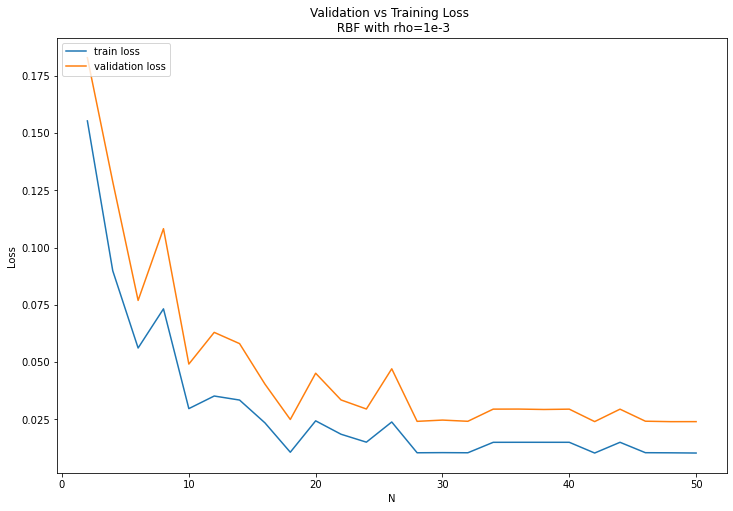

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(N_grid, train_loss_list)
plt.plot(N_grid, val_loss_list)
plt.title('Validation vs Training Loss \n RBF with rho=1e-3')
plt.ylabel('Loss')
plt.xlabel('N')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()